# Import the necessary libraries


In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer



## Loading in the data

Here we will load the datasets that we will be working with

In [88]:
df_test_features = pd.read_csv('data/test_set_features.csv')
df_training_features = pd.read_csv('data/training_set_features.csv')
df_training_labels = pd.read_csv('data/training_set_labels.csv')

## Data Exploration

Here we will explore the structure of the datasets and look at the distributions before we begin the analysis.
We will first begin with the summary statistics within the data
We will first start with:
 - The training data then
 - the test data then
 - look at the labels

### Main features within the datasets:
The first column respondent_id is a unique and random identifier
For all binary variables: 0 = No; 1 = Yes.

 - h1n1_concern - _Level of concern about the H1N1 flu._
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
_0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge._
- behavioral_antiviral_meds - _Has taken antiviral medications. (binary)_
- behavioral_avoidance - _Has avoided close contact with others with flu-like symptoms. (binary)_
- behavioral_face_mask - _Has bought a face mask. (binary)_
- behavioral_wash_hands - _Has frequently washed hands or used hand sanitizer. (binary)_
- behavioral_large_gatherings - _Has reduced time at large gatherings. (binary)_
- behavioral_outside_home - _Has reduced contact with people outside of own household. (binary)_
- behavioral_touch_face - _Has avoided touching eyes, nose, or mouth. (binary)_
- doctor_recc_h1n1 - _H1N1 flu vaccine was recommended by doctor. (binary)_
- doctor_recc_seasonal - _Seasonal flu vaccine was recommended by doctor. (binary)_
- chronic_med_condition - _Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)_
- child_under_6_months - _Has regular close contact with a child under the age of six months. (binary)_
- health_worker - _Is a healthcare worker. (binary)_
- health_insurance - _Has health insurance. (binary)_
- opinion_h1n1_vacc_effective - _Respondent's opinion about H1N1 vaccine effectiveness._
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - _Respondent's opinion about risk of getting sick with H1N1 flu without vaccine._
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - _Respondent's worry of getting sick from taking H1N1 vaccine._
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - _Respondent's opinion about seasonal flu vaccine effectiveness_.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk -_Respondent's opinion about risk of getting sick with seasonal flu without vaccine._
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - _Respondent's worry of getting sick from taking seasonal flu vaccine._
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - _Age group of respondent._
- education - _Self-reported education level._
- race - _Race of respondent._
- sex - _Sex of respondent._
- income_poverty - _Household annual income of respondent with respect to 2008 Census poverty thresholds._
- marital_status - _Marital status of respondent._
- rent_or_own - _Housing situation of respondent._
- employment_status - _Employment status of respondent._
- hhs_geo_region - _Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings._
- census_msa - _Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census._
- household_adults - _Number of other adults in household, top-coded to 3._
- household_children - _Number of children in household, top-coded to 3._
- employment_industry - _Type of industry respondent is employed in. Values are represented as short random character strings._
- employment_occupation - _Type of occupation of respondent. Values are represented as short random character strings._

1. Training dataset

In [89]:
# 1. For our train dataset
# Here we are looking at the column dtypes and the number of elements within the columns
print(df_training_features.info())# Here we are looking at the column dtypes and the number of items within the columns
print(df_training_features.describe()) # Here we are attempting to look at the mean, min and max values of the columns
print("\n---------------------------\n")
print("It seems this portion of our data has 36 columns and a mixture of dtypes i.,e int, floats and object types")
print("There seems to be some missing data")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [90]:
def col_data(data):
    """This function takes in a dataframe and returns infomation about it"""
    info = print(f"""The following columns are of type numeric: \n
                 -----------------------------
                 | These are the column names|
        --------------------------------------
        {data.select_dtypes('number').columns} \n
        -------------------------------
        a total of {data.select_dtypes('number').columns.shape} columns
        ----------------------
    These other remaining columns are non-numeric \n
    --------------------------
    | These are the column names|
    -----------------------------
    {data.select_dtypes('object').columns}\n
    ----------------------------
    a total of {data.select_dtypes('object').columns.shape} columns
    """)
    return info

In [91]:
print("We will use the function we created above to get infomation about the training dataset")
col_data(df_training_features)

We will use the function we created above to get infomation about the training dataset
The following columns are of type numeric: 

                 -----------------------------
                 | These are the column names|
        --------------------------------------
        Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object') 

        -------------------------------
        a 

Lets try and visualize the missing data for this data

### Train dataset summary
- This dataset has 26707 unique Ids representing the individual respondents
- The data has a 36 columns of a mixture of int, floats and object types
- 24 of the columns are numeric while 12 columns are non-numeric
- There are some columns with some missing values
- The all of the columns in this dataset apart from the respondent_id column seem to be either behavioural or demographics data.


##### Lets try and visualize the missing data from our training dataset

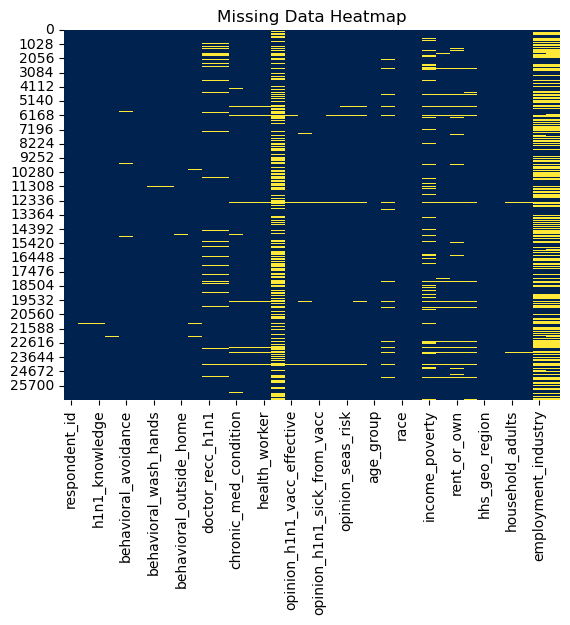

In [92]:
sns.heatmap(df_training_features.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

#### 2. Test Dataset

In [93]:
# 2. Test Dataset
# Here we are looking at the column dtypes and the number of elements within the columns

print(df_test_features.info())# Here we are looking at the column dtypes and the number of items within the columns
print(df_test_features.describe()) # Here we are attempting to look at the mean, min and max values of the columns
print("\n---------------------------\n")
print("It seems this portion of our data has 36 columns and a mixture of dtypes i.,e int, floats and object types")
col_data(df_test_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

##### Lets try and visualize the missing data from our testing dataset

### Test dataset summary
- This dataset has 26707 unique Ids representing the individual respondents
- The data has a 36 columns of a mixture of int, floats and object types
- 24 of the columns are numeric while 12 columns are non-numeric
- There are some columns with some missing values
- The all of the columns in this dataset apart from the respondent_id column seem to be either behavioural or demographics data.

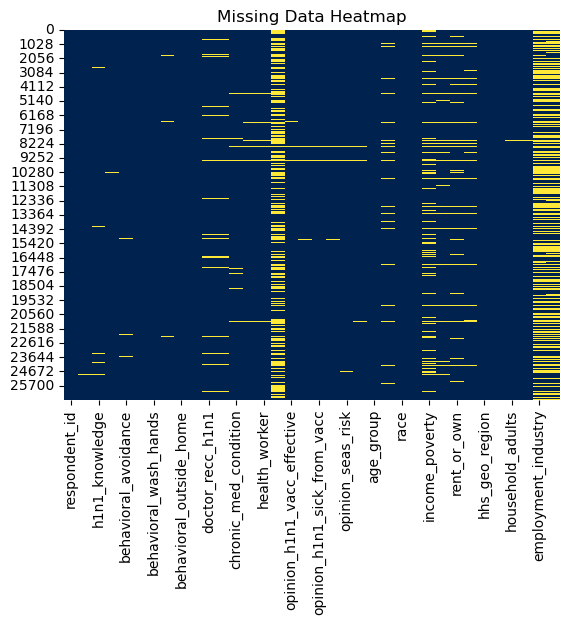

In [94]:
sns.heatmap(df_test_features.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

3. For the Training Set_labels

In [95]:
print("The following are the summary of the columns:\n")
print(df_training_labels.info())
print("\n\nMissing values within the columns:\n\n{}".format(df_training_labels.isnull().sum()))

print("\nThe data for training labels also has 26707 entries with 3 columns of type int")


The following are the summary of the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB
None


Missing values within the columns:

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

The data for training labels also has 26707 entries with 3 columns of type int


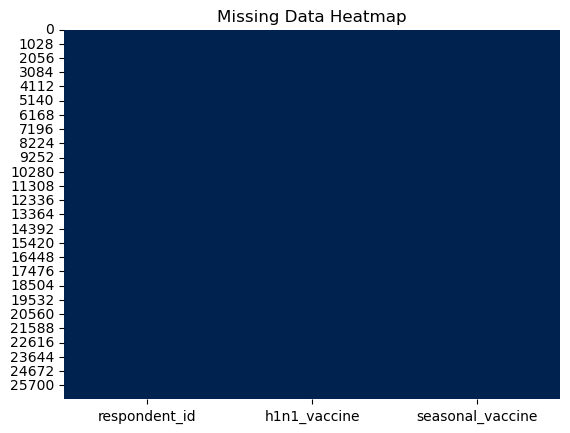

In [96]:
sns.heatmap(df_training_labels.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

#### Training label summary
- This one has  26707 entries with 3 cols of type int
- The first column is the respondent id which contains the unique identifiers
- Then the H1N1 vaccine and the Seasonal vaccine columns
- This portion of the data has 0 missing values

#### Strategy for the missing values
- We will look at the sample distributions for each of the main data groups in our data and determine the best way for filling in the missing values

In [97]:
# Here we will categorize the columns with their data types

binary_cols = df_training_features.columns[3:16].tolist()

ordinal_cols = df_training_features.columns[[1,2,] + list(range(16,22))].tolist()

nominal_cols = df_training_features.columns[list(range(22,32)) + [-2,-1]].tolist()

numeric_cols = df_training_features.columns[list(range(32,34))].tolist()


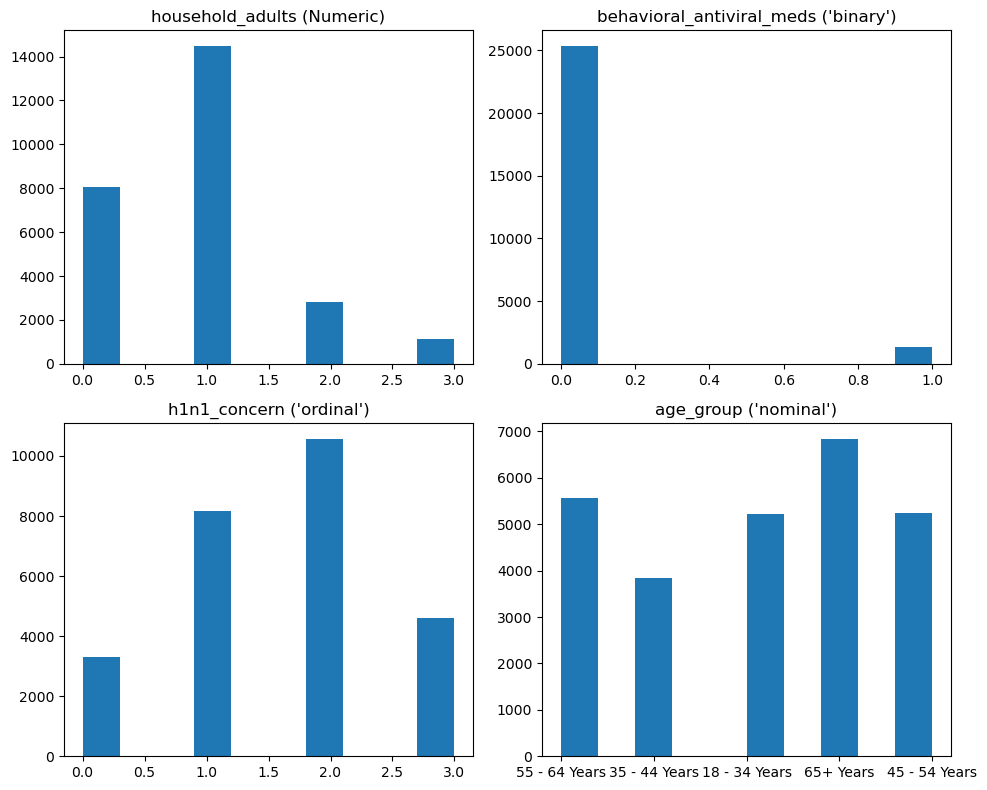

In [98]:
# Here we view the first columns and their distributions

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Accessing the first column from each Index
axes[0].hist(df_training_features[numeric_cols[0]])
axes[0].set_title(f"{numeric_cols[0]} (Numeric)")

axes[1].hist(df_training_features[binary_cols[0]])
axes[1].set_title(f"{binary_cols[0]} ('binary')")

axes[2].hist(df_training_features[ordinal_cols[0]])
axes[2].set_title(f"{ordinal_cols[0]} ('ordinal')")


axes[3].hist(df_training_features[nominal_cols[0]])
axes[3].set_title(f"{nominal_cols[0]} ('nominal')")

plt.tight_layout()
plt.show()



***The following is the strategy that we will use to deal with the missing values within the data***

| Data type| Action| Reason |
|---------|-------|--------|
| Binary | Fill using the mode | Because binary variables have only two categories (e.g., Yes/No). The mode is a logical choice that preserves the data's distribution. | 
| Ordinal | Fill using the mode| Because the values are categorical, they  have a natural order but not a numerical distance therefore using mode will enable us not make assumptions on the distances|
| Nominal | Fill using Missing | Because the values have no inherent order it is wise to label the data as unknown so that the model can still learn from it. |
| Numeric columns | Fill using the median| Because the data is continous and median is more robust to outliers |

We will then use the SimpleImputer class from sklearn to encode the missing values.


Note:
Our Numeric column has some non-numeric missing data which is labelled as missing. We need to convert this to a numeric type

In [99]:
def imputer(df):
    "This funcion takes in a dataframe and performs simple imputation"

    binary_imputer = SimpleImputer(strategy='most_frequent')
    df[binary_cols] = binary_imputer.fit_transform(df[binary_cols])
    ordinal_imputer = SimpleImputer(strategy='most_frequent')
    df[ordinal_cols] = ordinal_imputer.fit_transform(df[ordinal_cols])
    nominal_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
    df[nominal_cols] = nominal_imputer.fit_transform(df[nominal_cols])
    
    # Here we are converting the two numeric cols to a numeric type
    df['household_adults'] = df['household_adults'].replace('Missing', np.nan)
    df['household_children'] = df['household_children'].fillna(df['household_children'].median())

    numeric_imputer = SimpleImputer(strategy='median')
    df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

    return df

In [100]:
# Call the imputer function on both the train and test datasets
df_train = imputer(df_training_features)
df_test = imputer(df_test_features)

Lets confirm that we have removed all the nulls in our training dataset

In [101]:
df_training_features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

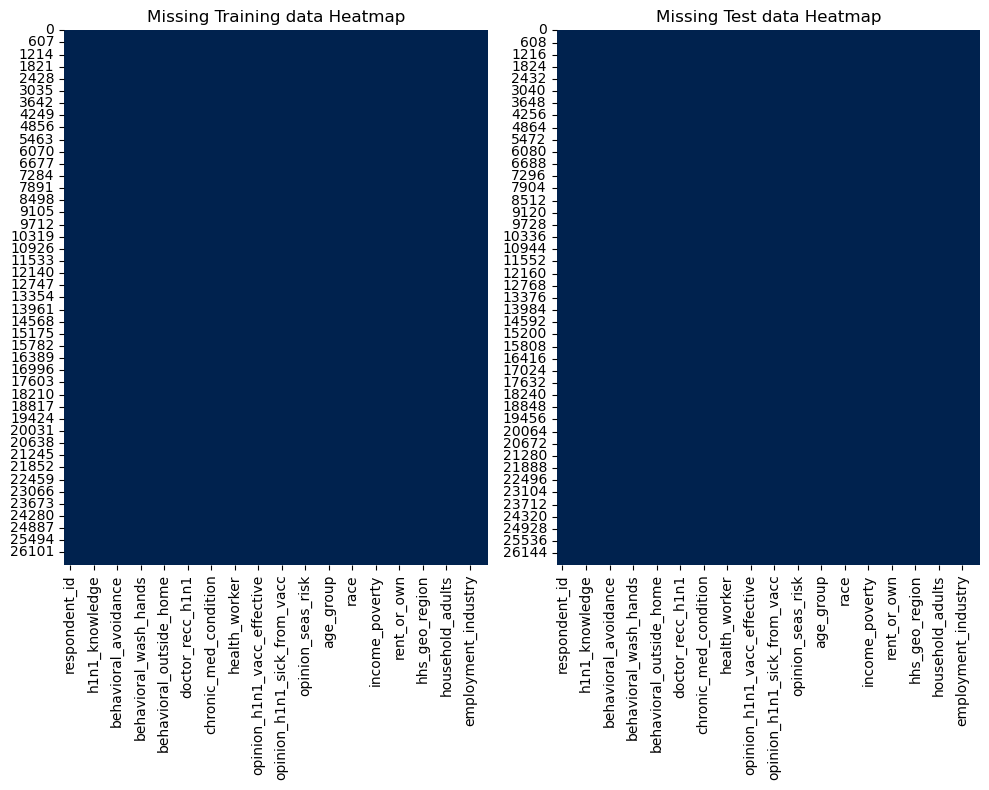

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
axes = axes.flatten()
sns.heatmap(df_training_features.isnull(), cbar=False, cmap='cividis', ax=axes[0])
axes[0].set_title('Missing Training data Heatmap')

sns.heatmap(df_test_features.isnull(), cbar=False, cmap='cividis', ax=axes[1])
axes[1].set_title('Missing Test data Heatmap')
plt.tight_layout()
plt.show()

### Addition of labels to the training data

- Before we begin building the model we first need to add the labels to the training data to ensure that our two target variables that is H1N1 vaccination and seasonal vaccination data is added to the training data.
- To do this we first need to confirm that both datasets have the same dimensions for proper merging.


In [103]:
# checking for matching column lengths

np.testing.assert_array_equal(df_train.index.values, df_training_labels.index.values, "The test has failed") 

Since the shape and the elements of these objects are equal we will proceed with merging the two datasets using the unique identifiers on the first column

But first lets check the distribution of the two vaccines using a simple bar chart

In [104]:
def vaccine_counts(vaccine_count, title):
    "This function takes in vaccination counts and title and generates a simple bar chart from the input"
    fig, ax = plt.subplots(figsize=(6, 3))

    # Plot horizontal bar chart
    bars = ax.barh(vaccine_count.index.map({0: "Not Vaccinated", 1: "Vaccinated"}), 
                vaccine_count.values, 
                color=["#13F4E19A", "#D0B22B"])

    # This adds value labels to bars
    for bar in bars:
        ax.text(bar.get_width() + 0.01, 
                bar.get_y() + bar.get_height()/2, 
                f"{bar.get_width():.2%}", 
                va='center', fontsize=10)

    ax.set_xlabel("Proportion of People")
    ax.set_title(title)
    ax.set_xlim(0, 1)
    plt.tight_layout()
    plt.show()


In [105]:
# Here we are generating the vaccination counts from the data

h1n1_count = df_training_labels.h1n1_vaccine.value_counts(normalize=True)
seasonal_vaccine_count = df_training_labels['seasonal_vaccine'].value_counts(normalize=True)

print(f"This is the result of {h1n1_count} and this is the one for the seasonal {seasonal_vaccine_count}")

This is the result of h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64 and this is the one for the seasonal seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64


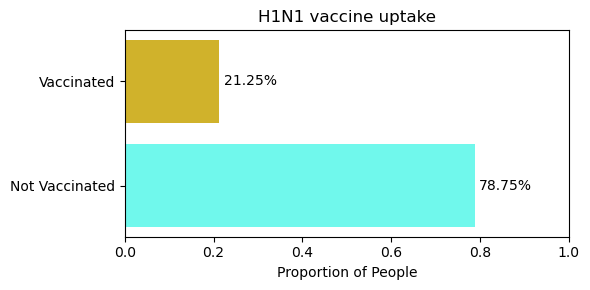

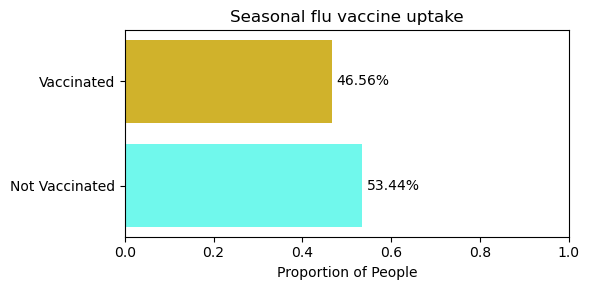

In [106]:
vaccine_counts(h1n1_count,'H1N1 vaccine uptake')
vaccine_counts(seasonal_vaccine_count,'Seasonal flu vaccine uptake')

***Interpretation:***
- From this we see that the H1N1 vaccine did not perform very well in 2009 as only 21.25% of the total respondents were vaccinated against the disease.
- For the seasonal flu the vaccination rate was almost half, indicating a better uptake than the H1N1 swine flu vaccine.
- We also note that there seems to be some class imbalance in the H1N1 vaccine. This means that if we train our model using this data as is there is a high chance that the model may gain some bias thuss favouring the majority.
- The seasonal flu vaccine seems to be relatively stable for normal modelling

### Merging the two datasets

We are merging the two datasets using the respondent Id so that we are able to get the target features onto our training dataset, this will also help us respondents that might mistakenly have only the target data but no much information.

For this process we will use the pandas .join method to concatenate the two dataframes together

In [107]:
merged_df = pd.merge(df_train, df_training_labels, how='left')
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Missing,Missing,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Missing,Missing,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


We can now try and identify the most important features by first of all checking the correlations

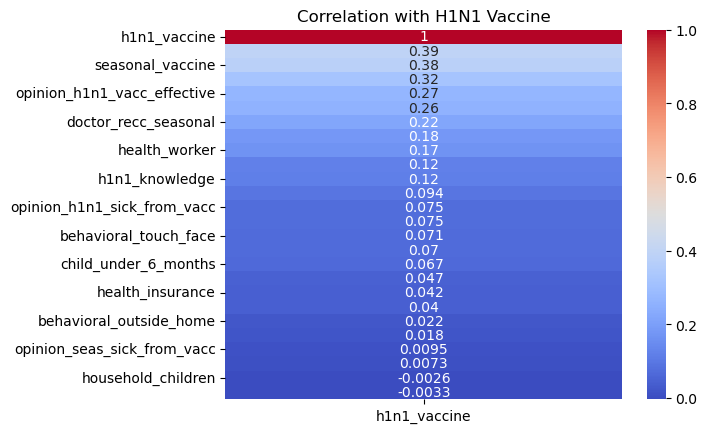

In [108]:
# Step 1: Select only numeric columns
numeric_df = merged_df.select_dtypes(include='number')

# Step 2: Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: View correlation of 'h1n1_vaccine' with other variables
correlation_with_h1n1 = correlation_matrix['h1n1_vaccine'].sort_values(ascending=False)

# Step 4: Display
sns.heatmap(correlation_with_h1n1.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation with H1N1 Vaccine")
plt.show()



#### Preprocessing
Now that we have our training data cleaned and merged with the training labels, we will begin the preprocessing phase which includes:
1. Dropping the respondent ID since it has no useful information necessary for modelling
2. Grouping the columns into two types numeric and categorical
3. Perform OneHotEncoding on the categorical columns
4. Define our X features and our target
5. fit a model

In [ ]:

from sklearn.preprocessing import StandardScaler
# 1. Droping the respondent_ID column
df = merged_df.drop(columns=['respondent_id'])  # It's just an ID, not useful for prediction

# 2. Grouping of the columns
# numerics
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('h1n1_vaccine') # These are our targets and the numeric cols will only be on the X train
numeric_cols.remove('seasonal_vaccine') 

# Categorical
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 3. Perform OneHotEncoding

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Choosing X and Y
X = df_encoded.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])  # features
y = df_encoded['h1n1_vaccine']  # target

# 5. Scaling our data
from sklearn.model_selection import train_test_split
X[numeric_cols] = StandardScaler().fit_transform(X[numeric_cols]) # Here we are scaling our data so that we take care of outliers

# 6. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. fit the random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

initial_model = LogisticRegression(random_state=42)
initial_model.fit(X_train, y_train)

y_pred = initial_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("""
From this initial model with values 0 -  representing those who did not get the H1N1 vaccine and 1 representing those who got the H1N1 vaccine
      We see that 
      pr
""")


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4207
           1       0.67      0.44      0.53      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342



This is the interpretation of the above output;

| Target | Metric | value | Explanation |
|--------|--------|-------|------------|
|0 - Received the vaccine | 

In [141]:
# Train-test split again
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Logistic regression with class_weight
log_reg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg_balanced.fit(X_train2, y_train2)

# Predictions
y_pred2 = log_reg_balanced.predict(X_test2)

# Evaluation
print("\nLogistic Regression with Balanced Class Weights")
print("-----------------------------------------------")
print(classification_report(y_test2, y_pred2))



Logistic Regression with Balanced Class Weights
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4207
           1       0.47      0.72      0.57      1135

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.71      5342
weighted avg       0.82      0.77      0.79      5342



## Lets try a decision tree

In [116]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [128]:
# Split the data
X = merged_df.drop(columns=['respondent_id','h1n1_vaccine', 'seasonal_vaccine'])
y1 = merged_df[['h1n1_vaccine']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X_train.columns))

# Train the decision tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

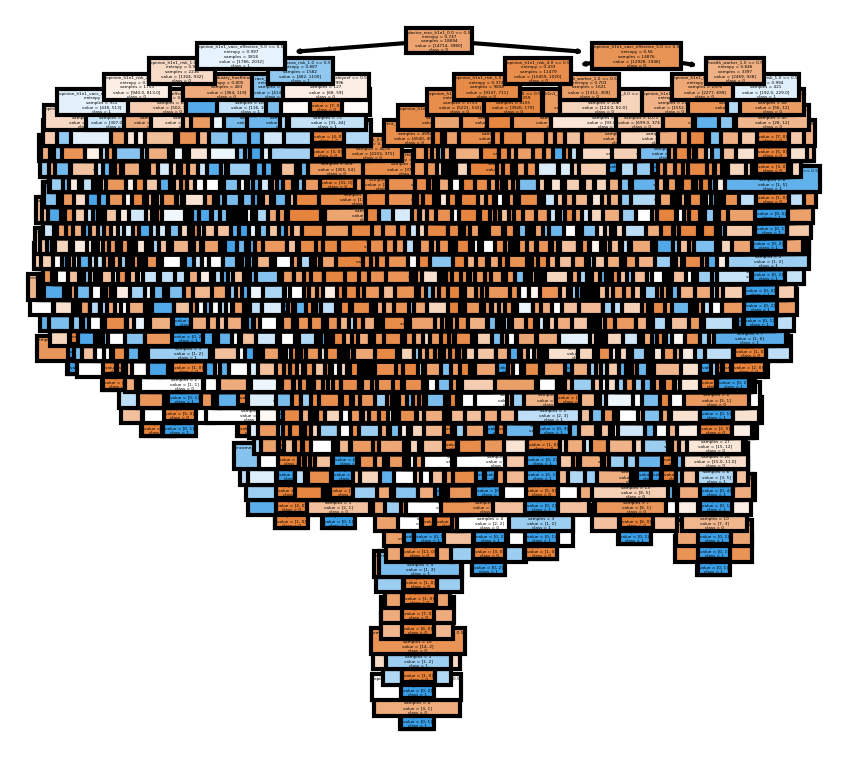

In [127]:
# Plotting the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [129]:
# Evaluating the predictive performance
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.7535255210283289


In [131]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test1, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.64

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,4000,207,4207
1,677,458,1135
All,4677,665,5342


In [132]:
from sklearn.metrics import confusion_matrix

# If you want a labeled confusion matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test1, y_pred),
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

print(conf_matrix)


          Predicted 0  Predicted 1
Actual 0         4000          207
Actual 1          677          458


IndexError: index 37 is out of bounds for axis 0 with size 35

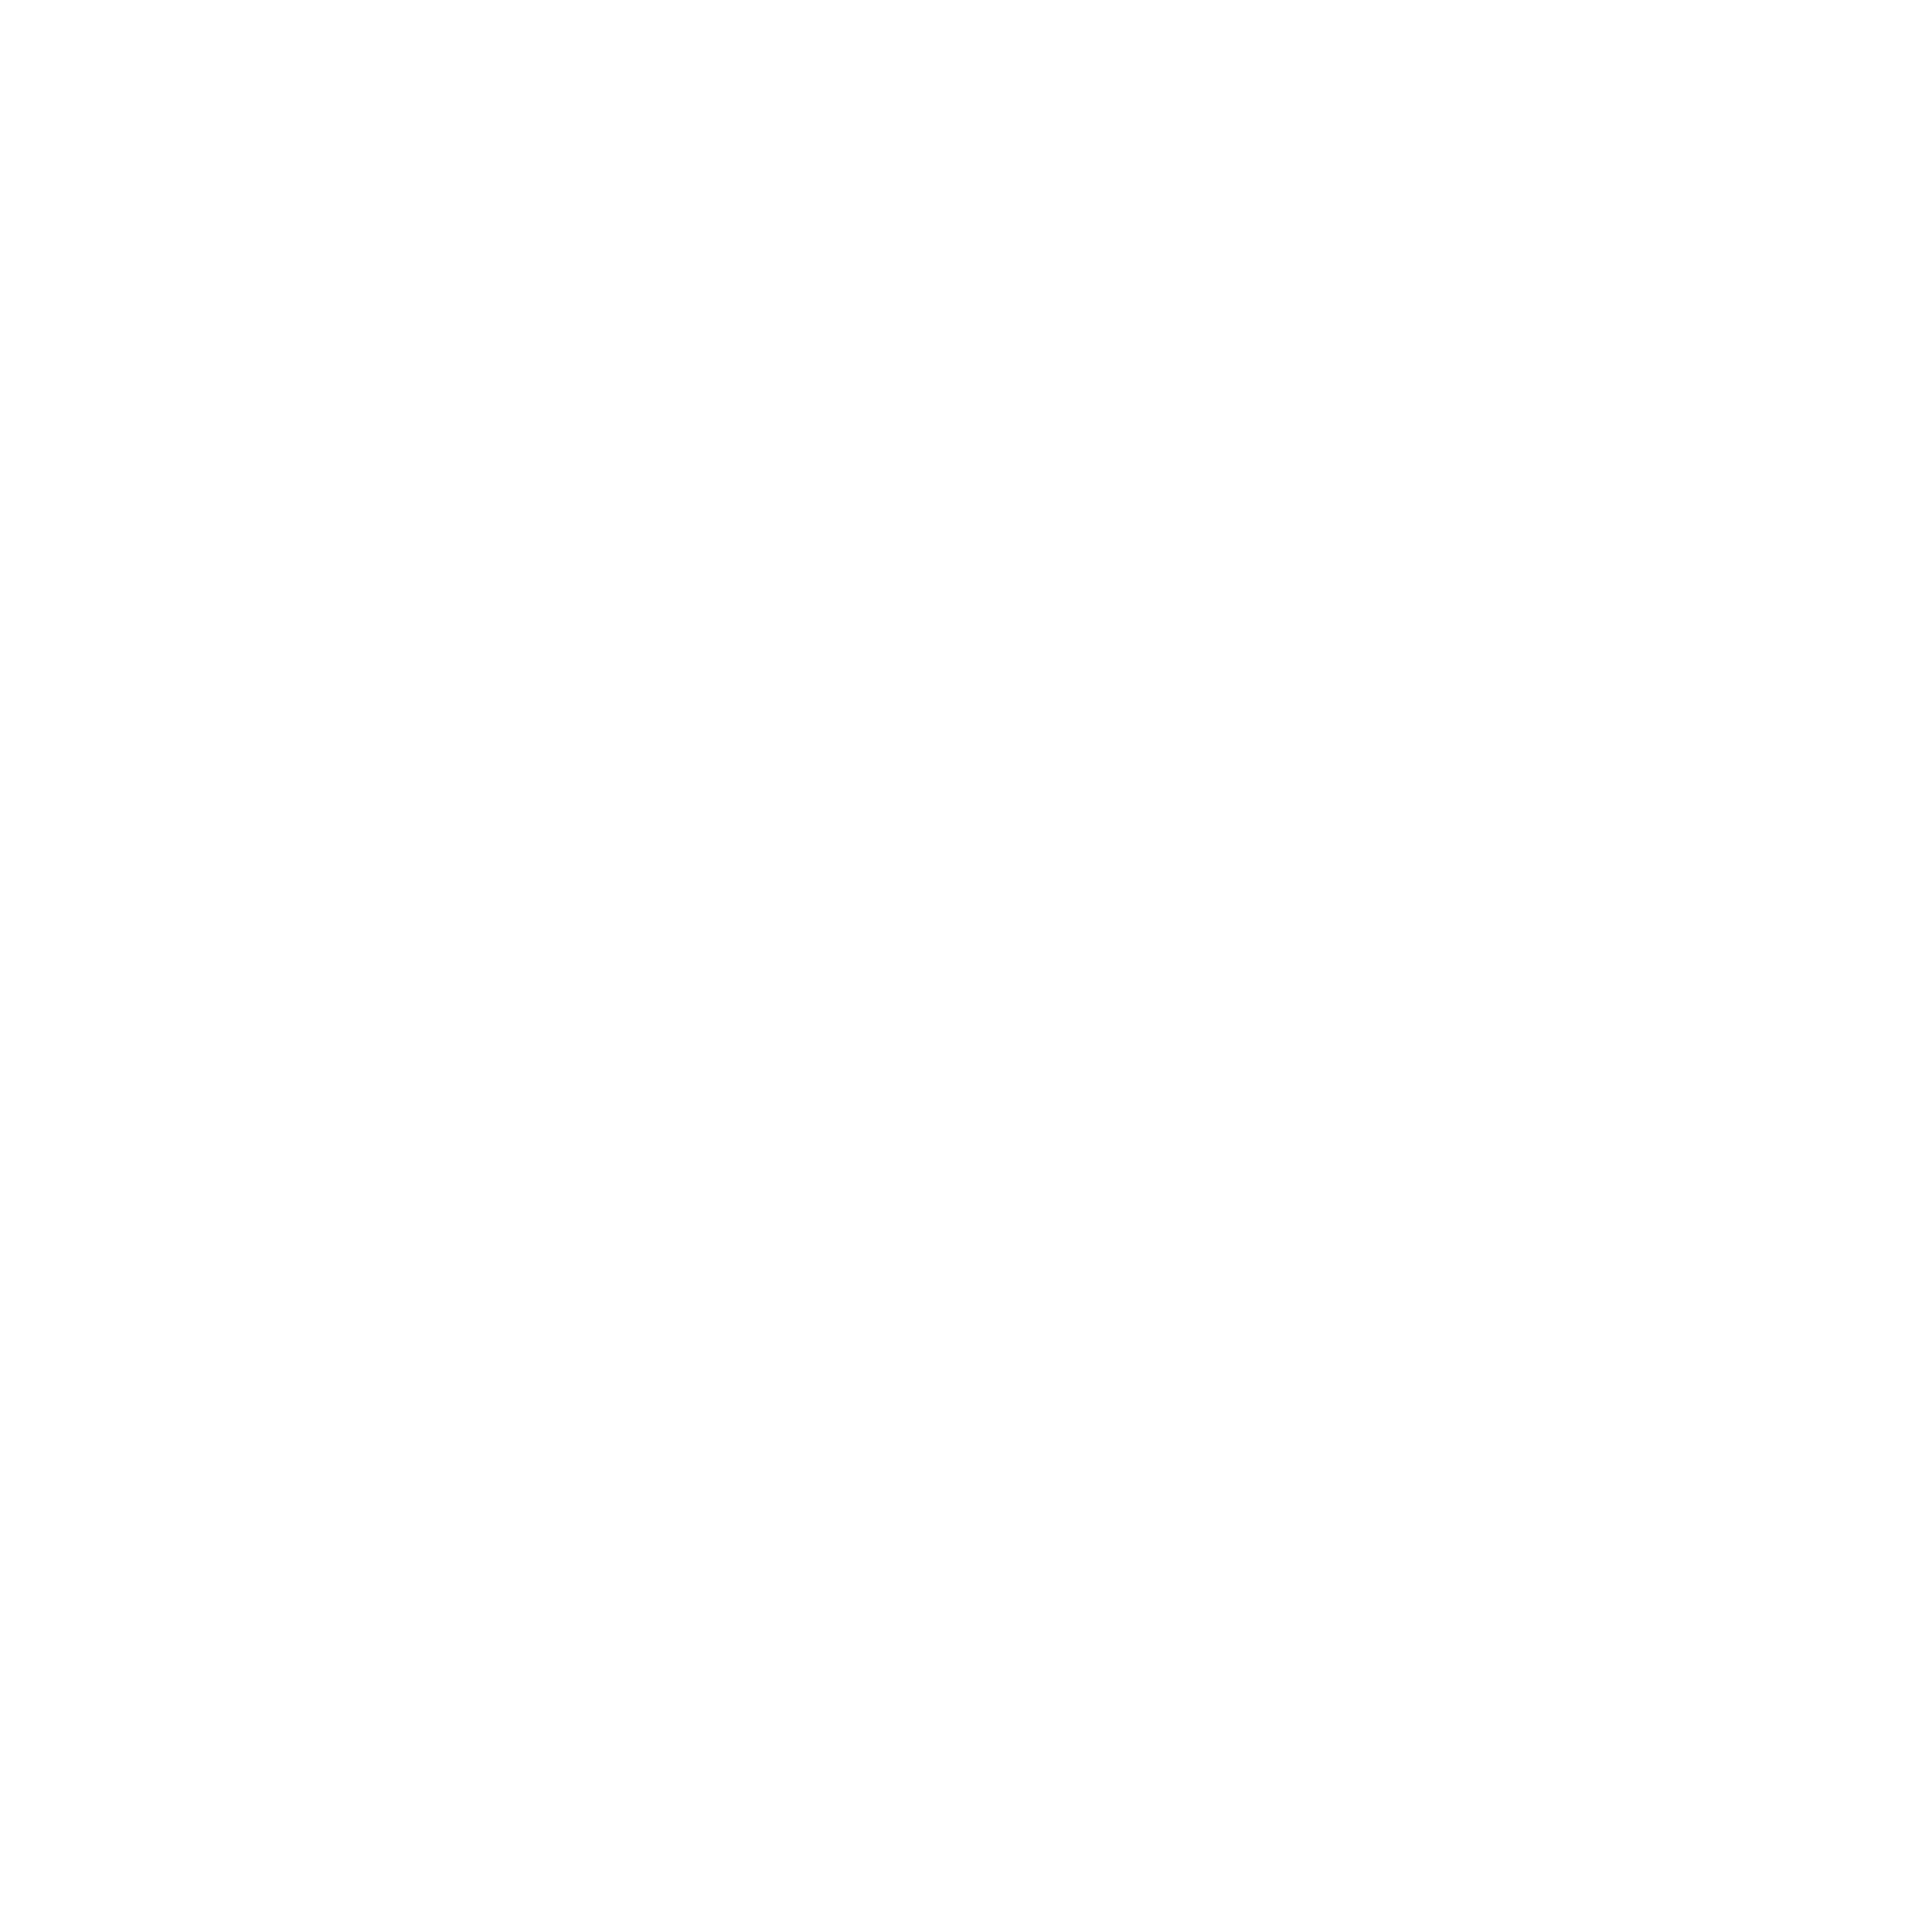

In [135]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train_ohe, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=10, splitter='best')

# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Instantiate the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Use F1 score since your classes are imbalanced
f1 = make_scorer(f1_score)

# Cross-validation
f1_scores = cross_val_score(log_reg, X_train_ohe, y_train, cv=5, scoring=f1)

print("Logistic Regression with Cross-Validation")
print("----------------------------------------")
print(f"F1 scores for each fold: {f1_scores}")
print(f"Average F1 score: {f1_scores.mean():.4f}")


Logistic Regression with Cross-Validation
----------------------------------------
F1 scores for each fold: [0.54790419 0.53587786 0.54292343 0.52923077 0.52377241]
Average F1 score: 0.5359


In [138]:
# Train-test split again
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Logistic regression with class_weight
log_reg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg_balanced.fit(X_train2, y_train2)

# Predictions
y_pred2 = log_reg_balanced.predict(X_test2)

# Evaluation
print("\nLogistic Regression with Balanced Class Weights")
print("-----------------------------------------------")
print(classification_report(y_test2, y_pred2))


ValueError: could not convert string to float: '18 - 34 Years'